##Run this

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#use this string for the path to the folder containing all the images in google drive

folder_path = '/content/drive/MyDrive/Semester2/Deep_learning/PROJECT_DEEP_LEARNING/'

In [ ]:
class_indices_file = open(folder_path+ 'ucfTrainTestlist_recogintion/classInd.txt', 'r')
class_index = {}
for line in class_indices_file:
    class_ = line.split(' ')
    class_index[class_[1].strip('\n')] = int(class_[0])

class_indices_file.close()

In [ ]:
class_index

{'ApplyEyeMakeup': 1,
 'ApplyLipstick': 2,
 'Archery': 3,
 'BabyCrawling': 4,
 'BalanceBeam': 5,
 'BandMarching': 6,
 'BaseballPitch': 7,
 'Basketball': 8,
 'BasketballDunk': 9,
 'BenchPress': 10,
 'Biking': 11,
 'Billiards': 12,
 'BlowDryHair': 13,
 'BlowingCandles': 14,
 'BodyWeightSquats': 15,
 'Bowling': 16,
 'BoxingPunchingBag': 17,
 'BoxingSpeedBag': 18,
 'BreastStroke': 19,
 'BrushingTeeth': 20,
 'CleanAndJerk': 21,
 'CliffDiving': 22,
 'CricketBowling': 23,
 'CricketShot': 24,
 'CuttingInKitchen': 25,
 'Diving': 26,
 'Drumming': 27,
 'Fencing': 28,
 'FieldHockeyPenalty': 29,
 'FloorGymnastics': 30,
 'FrisbeeCatch': 31,
 'FrontCrawl': 32,
 'GolfSwing': 33,
 'Haircut': 34,
 'Hammering': 35,
 'HammerThrow': 36,
 'HandstandPushups': 37,
 'HandstandWalking': 38,
 'HeadMassage': 39,
 'HighJump': 40,
 'HorseRace': 41,
 'HorseRiding': 42,
 'HulaHoop': 43,
 'IceDancing': 44,
 'JavelinThrow': 45,
 'JugglingBalls': 46,
 'JumpingJack': 47,
 'JumpRope': 48,
 'Kayaking': 49,
 'Knitting': 50,

In [ ]:
req_classes = [[1,2], [8,9], [23,24], [30], [87], [70], [72], [100], [59,60,61,62,63,64,65,66,67], 
               [83],[98], [29], [85], [79], [80], [84], [51], [45], [77], [73], [44]]

class_names = []
for _ in req_classes:
    classes = []
    for __ in _:
      classes.append([key for key in list(class_index.keys()) if class_index[key] == __][0])
    class_names.append(classes)
class_names

[['ApplyEyeMakeup', 'ApplyLipstick'],
 ['Basketball', 'BasketballDunk'],
 ['CricketBowling', 'CricketShot'],
 ['FloorGymnastics'],
 ['SumoWrestling'],
 ['PullUps'],
 ['PushUps'],
 ['WritingOnBoard'],
 ['PlayingCello',
  'PlayingDaf',
  'PlayingDhol',
  'PlayingFlute',
  'PlayingGuitar',
  'PlayingPiano',
  'PlayingSitar',
  'PlayingTabla',
  'PlayingViolin'],
 ['SkyDiving'],
 ['WalkingWithDog'],
 ['FieldHockeyPenalty'],
 ['SoccerPenalty'],
 ['Shotput'],
 ['SkateBoarding'],
 ['SoccerJuggling'],
 ['LongJump'],
 ['JavelinThrow'],
 ['SalsaSpin'],
 ['Rafting'],
 ['IceDancing']]

In [ ]:
#dictonary for labels
label_dict = {}

label = 1
for _ in req_classes:
    for id in _:
        label_dict[id] = label
    label += 1

label_dict


{1: 1,
 2: 1,
 8: 2,
 9: 2,
 23: 3,
 24: 3,
 30: 4,
 87: 5,
 70: 6,
 72: 7,
 100: 8,
 59: 9,
 60: 9,
 61: 9,
 62: 9,
 63: 9,
 64: 9,
 65: 9,
 66: 9,
 67: 9,
 83: 10,
 98: 11,
 29: 12,
 85: 13,
 79: 14,
 80: 15,
 84: 16,
 51: 17,
 45: 18,
 77: 19,
 73: 20,
 44: 21}

In [ ]:
#considering only one test train split 01
train_path_file = open(folder_path + "ucfTrainTestlist_recogintion/trainlist01.txt", "r")
train_path_list = []
train_y = []
# print(next(train_path_file))
list_req_class = [i for l in req_classes for i in l]
print(list_req_class)
for _ in train_path_file:
    path, class_num = _.split(' ')
    if (int(class_num.strip('\n')) in list_req_class):
        train_path_list.append(path)
        train_y.append(label_dict[int(class_num.strip('\n'))])
        #print(int(label_dict[class_num.strip('\n')]))
    
train_path_file.close()


[1, 2, 8, 9, 23, 24, 30, 87, 70, 72, 100, 59, 60, 61, 62, 63, 64, 65, 66, 67, 83, 98, 29, 85, 79, 80, 84, 51, 45, 77, 73, 44]


In [ ]:
len(train_path_list)

3035

In [ ]:
test_path_file = open(folder_path + "ucfTrainTestlist_recogintion/testlist01.txt", "r")
test_path_list = []
test_y = []
# print(next(test_path_file))
for _ in test_path_file:
    path = _.strip('\n')
    a,b = path.split('/')
    if (class_index[a] in list_req_class):
        test_path_list.append(path)
        test_y.append(label_dict[class_index[a]])


test_path_file.close()

In [ ]:
len(test_path_list)

1214

In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
train_y_hot = pd.get_dummies(train_y)
test_y_hot = pd.get_dummies(test_y)

## Significant frames of a video

165.0
0.5087200693456295
1
0.5023430070890528
2
0.5011328743971056
3
0.5276386943705804
4
0.5015014396575685
5
0.5293567066508645
6
0.5218543672942603
7
0.5022660827619795
8
0.5003157129701832
9
0.5070316560720044
10
0.5000536396512836
11


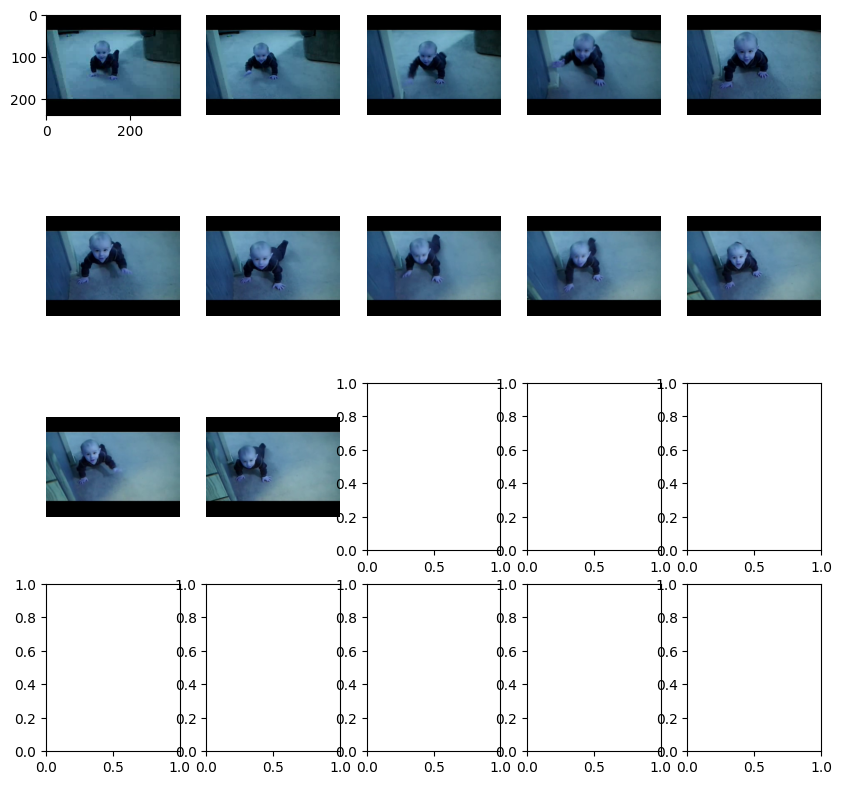

165.0
0.4178322328890418
1
0.43447129989533056
2
0.40101622086674577
3
0.4006047166617247
4
0.40538887820112096
5
0.402502319783464
6
0.4047274404981377
7
0.4039091461931826
8
0.41925282447063456
9
0.4073895510381722
10
0.4134976393259102
11
0.4087332593395146
12
0.4075102917393775
13
0.432868262327825
14
0.40480960435852803
15
0.4230961255419154
16
0.40262700293749915
17
0.4083113449149798
18
0.40410482302661593
19
[3, 7, 10, 21, 32, 41, 49, 63, 71, 75, 79, 82, 85, 88, 92, 97, 101, 104, 107]


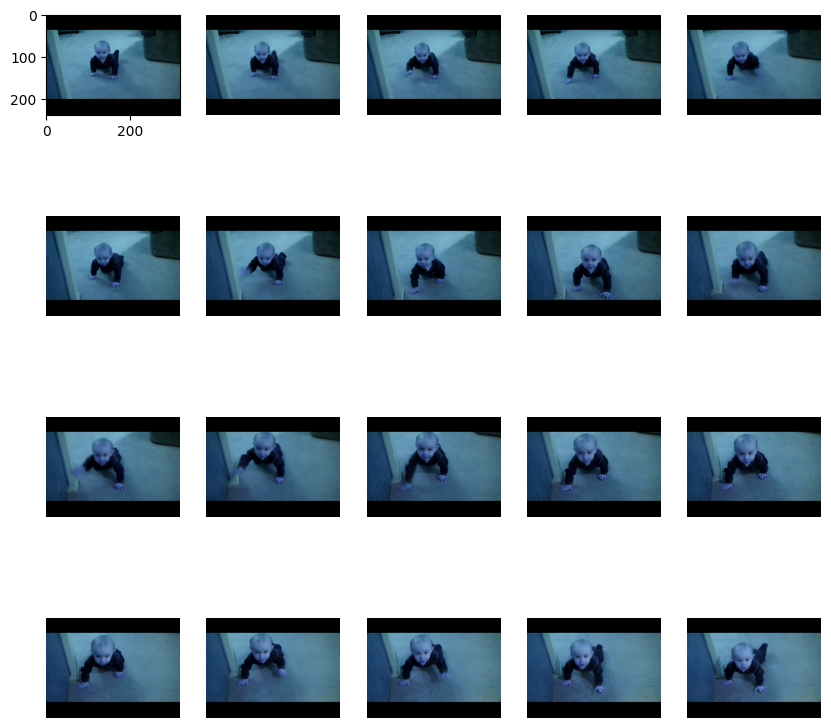

165.0
0.4529053052641197
1
0.4504204641849779
2
0.45027486945129663
3
0.45463660064683903
4
0.4575755183389451
5
0.459123466172558
6
0.45586491065538925
7
0.4582097385099273
8
0.45411018653313545
9
0.45832504245765937
10
0.4817103435252362
11
0.45421527234755305
12
0.4621244427867366
13
0.45366309702372964
14
0.45377171956282614
15
0.4508407233940455
16
0.45715472272479496
17
0.45340526469073167
18
0.4513396823853145
19
[5, 9, 34, 60, 72, 79, 85, 90, 97, 104, 109, 115, 119, 126, 131, 136, 142, 148, 154]


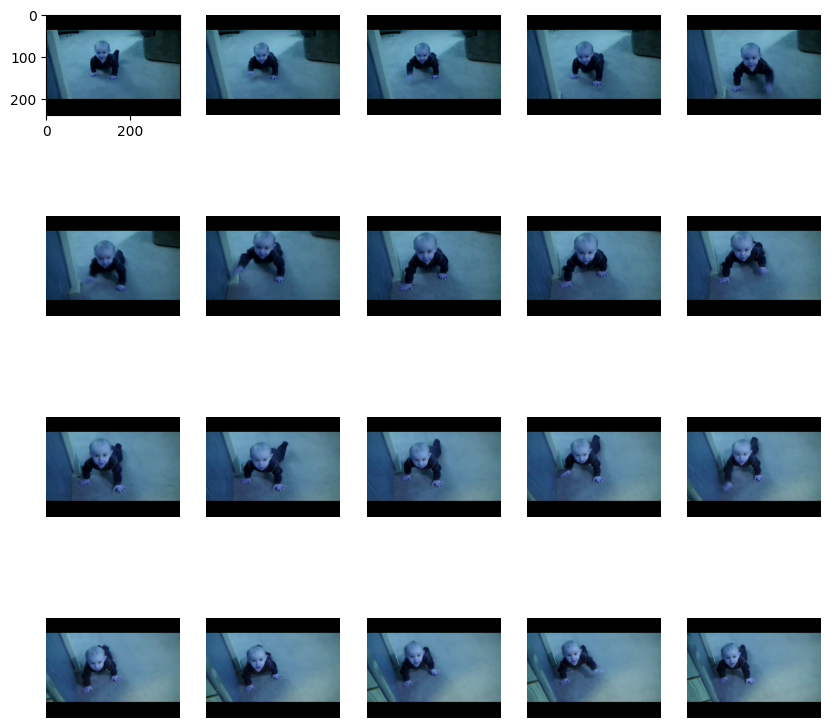

In [ ]:
frame_select = False
thresh = 0.5
eps = 0.1
iter_ = 0
while frame_select == False:
    cap = cv2.VideoCapture('/content/drive/MyDrive/Semester2/Deep_learning/PROJECT_DEEP_LEARNING/UCF-101/BabyCrawling/v_BabyCrawling_g01_c01.avi')
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print(total_frames)
    # Choose a reference frame
    ret, ref_frame = cap.read()

    # Compute the histogram of the reference frame
    ref_hist = cv2.calcHist([ref_frame], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    #distance = cv2.compareHist(ref_hist, frame_hist, cv2.HISTCMP_BHATTACHARYYA)
    frame_count = 0   # the number of frames we are considering
    frame_num = 0     #the actual frame number of the video
    # Loop through the remaining frames
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize = (10,10))
    axs = axs.flatten()

    axs[frame_count].imshow(ref_frame)
    sig_frames = []
    
    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        frame_num+=1
        # If there are no more frames, break out of the loop
        if not ret:
            break

        # Compute the histogram of the frame
        frame_hist = cv2.calcHist([frame], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

        # Compute the Bhattacharyya distance between the histograms
        distance = cv2.compareHist(ref_hist, frame_hist, cv2.HISTCMP_BHATTACHARYYA)

        
        
        # If the distance is above a threshold, this frame is significant
        if distance > thresh:
            #plt.imshow(frame)

            print(distance)
            frame_count +=1
            print(frame_count)
            axs[frame_count].imshow(frame)
            axs[frame_count].axis('off')
            sig_frames.append(frame_num)
            ref_hist = frame_hist
        
        
        if frame_count >= 19:
            print(sig_frames)
            break
    
    if (iter_ > 5):
        sig_frames0 = [sig_frames[i] for i in range(len(sig_frames)) if i%2 == 0]
        last_frame = sig_frames[-1]
        interval = (total_frames - last_frame)//10
        for i in range (10):
            sig_frames0.append(last_frame + interval*(i+1))
        print(sig_frames0)
        
        frame_select = True
    
    if (frame_count == 19 and frame_num > 2*total_frames/3):
        frame_select = True
        
    elif (frame_count < 20 and frame_num > 2*total_frames/3):
        thresh = thresh - eps
        eps = eps/2
        
    elif(frame_count == 19 and frame_num < 2*total_frames/3):
        thresh = thresh + eps
        eps = eps/2
    
    iter_ +=1 
    
    



            # Loop through the images and display them using the axis object

    #         axs[frame_count/5 + 1, frame_count%5 + 1].imshow(frame)
    #         axs[frame_count/5 + 1, frame_count%5 + 1].axis('off')


            # Display the figure
    plt.show()

    # Release the video capture object and close all windows
    cap.release()

## Significant frames, the function

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'pixel intensity of blue channel')

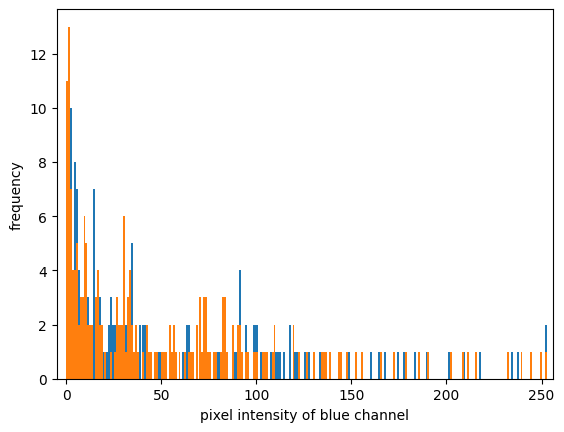

In [ ]:
cap = cv2.VideoCapture("/content/drive/MyDrive/Semester2/Deep_learning/PROJECT_DEEP_LEARNING/UCF-101/CricketBowling/v_CricketBowling_g05_c03.avi")

ret, ref_frame = cap.read()


for i in range (20):
    ret, new_frame = cap.read()

new_hist = cv2.calcHist([new_frame], [0], None, [256], [0, 256])
ref_hist = cv2.calcHist([ref_frame], [0], None, [256], [0, 256])
plt.hist(new_hist, bins=256, range=(0.0, 256.0))
plt.hist(ref_hist, bins=256, range=(0.0, 256.0))

# plt.hist(new_hist)
plt.xlim(-5,256)
plt.ylabel("frequency")
plt.xlabel("pixel intensity of blue channel")

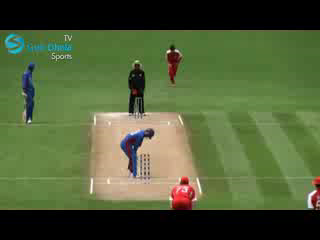

In [ ]:
cv2_imshow(ref_frame)

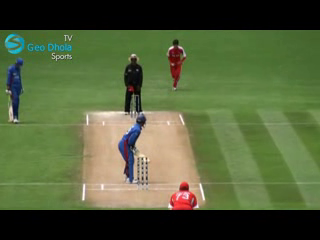

In [ ]:
cv2_imshow(new_frame)

In [ ]:
plt.hist(ref_hist, bins=256, range=(0.0, 256.0))


In [ ]:

def sig_frames_BD(path):
    frame_select = False
    thresh = 0.5
    eps = 0.1
    iter_ = 0


    case_ = 0


    while frame_select == False:
        cap = cv2.VideoCapture(path)
        total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        #print(total_frames)
        #a reference frame
        ret, ref_frame = cap.read()

        # Compute the histogram of the reference frame
        ref_hist = cv2.calcHist([ref_frame], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
        frame_count = 0   # the number of frames we are considering
        frame_num = 0     #the actual frame number of the video


        sig_frames = [0]
        
        while True:
            
            ret, frame = cap.read()
            frame_num+=1

            if not ret:
                break       #no frames remaining

            frame_hist = cv2.calcHist([frame], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

            # Compute the Bhattacharyya distance between the histograms ref_hist and frame_hist
            distance = cv2.compareHist(ref_hist, frame_hist, cv2.HISTCMP_BHATTACHARYYA)

            
            # If the distance is above a threshold, this frame is significant
            if distance > thresh:
                #print(distance)
                frame_count +=1
                #print(frame_count)
                sig_frames.append(frame_num)
                ref_hist = frame_hist
            
            
            if frame_count >= 19:
                break
            
        iter_ +=1
        #print(total_frames,sig_frames)
        


        if (frame_count == 19 and frame_num > 2*total_frames/3):
            frame_select = True
            #print(total_frames, sig_frames)

        #case1    
        elif (frame_count < 19 and frame_num > 2*total_frames/3):
            
            if case_ == 0:
                case_ = 1
            # elif case_ == 1:
            #     continue
            elif case_ == 2:
              eps = eps/2
              case_ = 1

            thresh = thresh - eps
            #print('case1')
            #print(total_frames, sig_frames)


        #case2 
        elif(frame_count == 19 and frame_num < 2*total_frames/3):
            
            if case_ == 0:
                case_ = 2
                continue
            # elif case_ == 2:
            #     continue
            elif case_ == 1:
              eps = eps/2
              case_ = 2

            thresh = thresh + eps
            #print('case2')
            #print(total_frames, sig_frames)
        
        #print(iter_)
        if (iter_ > 5):
            if (len(sig_frames) < 20):
                remain = 20 - len(sig_frames)
                randnums= list(np.random.randint(1, total_frames, remain))
                sig_frames0 = sig_frames + randnums
                sig_frames0 = sorted(sig_frames0)
                #print('case1')
                return total_frames,sig_frames0

            elif len(sig_frames) == 20 :
                sig_frames0 = [sig_frames[i] for i in range(len(sig_frames)) if i%2 == 0]
                #print(sig_frames0)
                last_frame = sig_frames0[-1]
                remain = 20 - len(sig_frames0)
                interval = (total_frames - last_frame)//remain
                #print(interval)
                for i in range (remain):
                    sig_frames0.append(last_frame + interval*(i+1))
                #print('case2')
                return total_frames,sig_frames0


         
        

        cap.release()
        
    return total_frames, sig_frames



In [ ]:
a, b =sig_frames_BD('/content/drive/MyDrive/Semester2/Deep_learning/PROJECT_DEEP_LEARNING/UCF-101/FieldHockeyPenalty/v_FieldHockeyPenalty_g12_c06.avi')

120.0 [0, 3, 4, 5, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 26, 27, 29, 31]
120.0 [0, 3, 4, 5, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 26, 27, 29, 31]
2
120.0 [0, 4, 9, 10, 18, 23, 35, 47, 54, 66, 74, 83, 89, 95, 101, 103, 107, 112, 115]
3
120.0 [0, 4, 5, 9, 10, 12, 14, 17, 20, 22, 27, 29, 32, 35, 37, 40, 43, 46, 48, 51]
4
120.0 [0, 4, 5, 10, 14, 19, 22, 29, 35, 40, 46, 51, 54, 56, 61, 65, 70, 73, 77, 80]
5
120.0 [0, 4, 5, 10, 14, 19, 22, 29, 35, 40, 46, 51, 54, 56, 61, 65, 70, 73, 77, 80]
6
[0, 5, 14, 22, 35, 46, 54, 61, 70, 77]
4.0


In [ ]:
len(b), b

(20,
 [0,
  5,
  14,
  22,
  35,
  46,
  54,
  61,
  70,
  77,
  81.0,
  85.0,
  89.0,
  93.0,
  97.0,
  101.0,
  105.0,
  109.0,
  113.0,
  117.0])

In [ ]:
a

250.0

In [ ]:
labels = np.unique(np.array(train_y))

In [ ]:
labels = [21]

In [ ]:
index = [i for i in range (len(test_y)) if test_y[i] == 11] 
print([test_path_list[i] for i in index])

['WalkingWithDog/v_WalkingWithDog_g01_c01.avi', 'WalkingWithDog/v_WalkingWithDog_g01_c02.avi', 'WalkingWithDog/v_WalkingWithDog_g01_c03.avi', 'WalkingWithDog/v_WalkingWithDog_g01_c04.avi', 'WalkingWithDog/v_WalkingWithDog_g02_c01.avi', 'WalkingWithDog/v_WalkingWithDog_g02_c02.avi', 'WalkingWithDog/v_WalkingWithDog_g02_c03.avi', 'WalkingWithDog/v_WalkingWithDog_g02_c04.avi', 'WalkingWithDog/v_WalkingWithDog_g02_c05.avi', 'WalkingWithDog/v_WalkingWithDog_g02_c06.avi', 'WalkingWithDog/v_WalkingWithDog_g03_c01.avi', 'WalkingWithDog/v_WalkingWithDog_g03_c02.avi', 'WalkingWithDog/v_WalkingWithDog_g03_c03.avi', 'WalkingWithDog/v_WalkingWithDog_g03_c04.avi', 'WalkingWithDog/v_WalkingWithDog_g03_c05.avi', 'WalkingWithDog/v_WalkingWithDog_g04_c01.avi', 'WalkingWithDog/v_WalkingWithDog_g04_c02.avi', 'WalkingWithDog/v_WalkingWithDog_g04_c03.avi', 'WalkingWithDog/v_WalkingWithDog_g04_c04.avi', 'WalkingWithDog/v_WalkingWithDog_g04_c05.avi', 'WalkingWithDog/v_WalkingWithDog_g05_c01.avi', 'WalkingWith

In [ ]:
for i in labels:
    indices = [j for j in range (len(test_y)) if test_y[j] == i]
    with open('/content/drive/MyDrive/Semester2/Deep_learning/PROJECT_DEEP_LEARNING/test_class_'+ str(i) +'_sig_frames.txt', 'w') as writefile:
        for vid_path in [test_path_list[ind] for ind in indices]:
            tot_frames, arr_frames = sig_frames_BD(folder_path+ 'UCF-101/' + vid_path)
            print(vid_path, '....Done!')
            writefile.write(f"{vid_path} {arr_frames}\n")

    writefile.close()
    

IceDancing/v_IceDancing_g01_c01.avi ....Done!
IceDancing/v_IceDancing_g01_c02.avi ....Done!
IceDancing/v_IceDancing_g01_c03.avi ....Done!
IceDancing/v_IceDancing_g01_c04.avi ....Done!
IceDancing/v_IceDancing_g01_c05.avi ....Done!
IceDancing/v_IceDancing_g01_c06.avi ....Done!
IceDancing/v_IceDancing_g01_c07.avi ....Done!
IceDancing/v_IceDancing_g02_c01.avi ....Done!
IceDancing/v_IceDancing_g02_c02.avi ....Done!
IceDancing/v_IceDancing_g02_c03.avi ....Done!
IceDancing/v_IceDancing_g02_c04.avi ....Done!
IceDancing/v_IceDancing_g02_c05.avi ....Done!
IceDancing/v_IceDancing_g02_c06.avi ....Done!
IceDancing/v_IceDancing_g02_c07.avi ....Done!
IceDancing/v_IceDancing_g03_c01.avi ....Done!
IceDancing/v_IceDancing_g03_c02.avi ....Done!
IceDancing/v_IceDancing_g03_c03.avi ....Done!
IceDancing/v_IceDancing_g03_c04.avi ....Done!
IceDancing/v_IceDancing_g03_c05.avi ....Done!
IceDancing/v_IceDancing_g03_c06.avi ....Done!
IceDancing/v_IceDancing_g04_c01.avi ....Done!
IceDancing/v_IceDancing_g04_c02.av

In [ ]:
# # class1_list = ["Basketball/v_Basketball_g09_c01.avi", "Basketball/v_Basketball_g09_c02.avi", "Basketball/v_Basketball_g09_c03.avi", "Basketball/v_Basketball_g09_c04.avi", "Basketball/v_Basketball_g09_c05.avi", "Basketball/v_Basketball_g10_c03.avi", "Basketball/v_Basketball_g12_c01.avi", "Basketball/v_Basketball_g12_c02.avi", "Basketball/v_Basketball_g12_c03.avi", "Basketball/v_Basketball_g12_c04.avi", "Basketball/v_Basketball_g12_c05.avi", "Basketball/v_Basketball_g13_c01.avi", "Basketball/v_Basketball_g13_c03.avi", "Basketball/v_Basketball_g14_c02.avi", "Basketball/v_Basketball_g14_c04.avi", "Basketball/v_Basketball_g19_c02.avi"]
# # class1_list = ["CricketBowling/v_CricketBowling_g14_c04.avi", "CricketBowling/v_CricketBowling_g14_c03.avi", "CricketBowling/v_CricketBowling_g14_c05.avi", "CricketBowling/v_CricketBowling_g17_c05.avi", "CricketShot/v_CricketShot_g10_c06.avi", "CricketShot/v_CricketShot_g14_c03.avi", "CricketShot/v_CricketShot_g21_c06.avi", "CricketShot/v_CricketShot_g23_c05.avi"]
# class1_list = ["ApplyEyeMakeup/v_ApplyEyeMakeup_g14_c01.avi", "ApplyEyeMakeup/v_ApplyEyeMakeup_g14_c02.avi", "ApplyEyeMakeup/v_ApplyEyeMakeup_g14_c03.avi"]

# ["CricketBowling/v_CricketBowling_g14_c01.avi", ]
# # ["WritingOnBoard/v_WritingOnBoard_g08_c02.avi","WritingOnBoard/v_WritingOnBoard_g08_c03.avi" , "WritingOnBoard/v_WritingOnBoard_g08_c04.avi", "WritingOnBoard/v_WritingOnBoard_g09_c01.avi", "WritingOnBoard/v_WritingOnBoard_g09_c02.avi" ,"WritingOnBoard/v_WritingOnBoard_g09_c03.avi", "WritingOnBoard/v_WritingOnBoard_g09_c04.avi","WritingOnBoard/v_WritingOnBoard_g09_c05.avi", "WritingOnBoard/v_WritingOnBoard_g10_c02.avi", "WritingOnBoard/v_WritingOnBoard_g10_c03.avi", "WritingOnBoard/v_WritingOnBoard_g10_c06.avi","WritingOnBoard/v_WritingOnBoard_g13_c05.avi", "WritingOnBoard/v_WritingOnBoard_g14_c02.avi", "WritingOnBoard/v_WritingOnBoard_g15_c03.avi","WritingOnBoard/v_WritingOnBoard_g17_c01.avi", "WritingOnBoard/v_WritingOnBoard_g19_c02.avi", "WritingOnBoard/v_WritingOnBoard_g23_c02.avi", "WritingOnBoard/v_WritingOnBoard_g23_c03.avi", "WritingOnBoard/v_WritingOnBoard_g23_c06.avi"]
# # ["PushUps/v_PushUps_g11_c01.avi", "PushUps/v_PushUps_g11_c02.avi", "PushUps/v_PushUps_g11_c03.avi", "PushUps/v_PushUps_g11_c04.avi"]
# # ["PullUps/v_PullUps_g25_c01.avi", "PullUps/v_PullUps_g25_c04.avi"]
# # ["SumoWrestling/v_SumoWrestling_g18_c04.avi"]
# # ["FloorGymnastics/v_FloorGymnastics_g08_c02.avi", "FloorGymnastics/v_FloorGymnastics_g18_c02.avi"]

In [ ]:
# with open(folder_path+'/train_hist_frames/class_1_sig_frames.txt', 'r+') as file1:
#     contents = file1.read()
#     lines = contents.splitlines()
#     #print(len(lines))
#     #print(lines[:10])
#     for i in range (len(lines)):
#         #print(line[i])
#         line_cont = str(lines[i]).split(' ')
#         if str(line_cont[0]) in class1_list:
#             lines.pop(i)
#             tot_frames, arr_frames = sig_frames_BD(folder_path+ 'UCF-101/' + str(line_cont[0]))
#             lines.insert(i, f"{str(line_cont[0])} {arr_frames}")
    
#     new_contents = "\n".join(lines)
#     file1.seek(0)
#     file1.write(new_contents)
#     file1.truncate()


In [ ]:
# ["CricketBowling/v_CricketBowling_g14_c04.avi", "CricketBowling/v_CricketBowling_g14_c03.avi", "CricketBowling/v_CricketBowling_g14_c05.avi", "CricketBowling/v_CricketBowling_g17_c05.avi", "CricketShot/v_CricketShot_g10_c06.avi", "CricketShot/v_CricketShot_g14_c03.avi", "CricketShot/v_CricketShot_g21_c06.avi", "CricketShot/v_CricketShot_g23_c05.avi"]

In [ ]:
# ["FloorGymnastics/v_FloorGymnastics_g08_c02.avi", "FloorGymnastics/v_FloorGymnastics_g18_c02.avi"]

In [ ]:
# ["SumoWrestling/v_SumoWrestling_g18_c04.avi"]

In [ ]:
# ["PullUps/v_PullUps_g25_c01.avi", "PullUps/v_PullUps_g25_c04.avi"]

In [ ]:
# ["PushUps/v_PushUps_g11_c01.avi", "PushUps/v_PushUps_g11_c02.avi", "PushUps/v_PushUps_g11_c03.avi", "PushUps/v_PushUps_g11_c04.avi"]

In [ ]:
# ["WritingOnBoard/v_WritingOnBoard_g08_c02.avi","WritingOnBoard/v_WritingOnBoard_g08_c03.avi" , "WritingOnBoard/v_WritingOnBoard_g08_c04.avi", "WritingOnBoard/v_WritingOnBoard_g09_c01.avi", "WritingOnBoard/v_WritingOnBoard_g09_c02.avi" ,"WritingOnBoard/v_WritingOnBoard_g09_c03.avi", "WritingOnBoard/v_WritingOnBoard_g09_c04.avi","WritingOnBoard/v_WritingOnBoard_g09_c05.avi", "WritingOnBoard/v_WritingOnBoard_g10_c02.avi", "WritingOnBoard/v_WritingOnBoard_g10_c03.avi", "WritingOnBoard/v_WritingOnBoard_g10_c06.avi","WritingOnBoard/v_WritingOnBoard_g13_c05.avi", "WritingOnBoard/v_WritingOnBoard_g14_c02.avi", "WritingOnBoard/v_WritingOnBoard_g15_c03.avi","WritingOnBoard/v_WritingOnBoard_g17_c01.avi", "WritingOnBoard/v_WritingOnBoard_g19_c02.avi", "WritingOnBoard/v_WritingOnBoard_g23_c02.avi", "WritingOnBoard/v_WritingOnBoard_g23_c03.avi", "WritingOnBoard/v_WritingOnBoard_g23_c06.avi"]

##reading frames from the files

In [ ]:
labels = np.unique(np.array(train_y))

In [ ]:
sig_frame_dict = {}
for i in labels:
    with open(folder_path+ 'class_'+ str(i) +'_sig_frames.txt', 'r') as readfile:
        contents = readfile.read()
        lines = contents.splitlines()
    for l in lines:
        l_arr = l.split(' ')
        sig_frame_dict[l_arr[0]] = eval(l_arr[1])
    readfile.close()

    with open(folder_path+ 'test_class_'+ str(i) +'_sig_frames.txt', 'r') as read_testfile:
        contents = readfile.read()
        lines = contents.splitlines()
    for l in lines:
        l_arr = l.split(' ')
        sig_frame_dict[l_arr[0]] = eval(l_arr[1])
    read_testfile.close()


